# **ML for roadsigns recognition**




# Library Installation

In [33]:
import numpy as np # provides extensive mathematical functions
import pandas as pd # used to manipulate and analyze data
import os # offers tools for creating and deleting directories
import cv2 # Python bindings package developed to handle computer vision issues
import matplotlib.pyplot as plt #offers a set of routines that allow matplotlib to function in the same way as MATLAB does.
import seaborn as sns # a Python module for creating statistical visuals
import tensorflow as tf # a library for rapid numerical computation
from tensorflow import keras # interface for addressing machine learning issues, with a focus on modern deep learning techniques
from PIL import Image # a library for introducing a variety of image processing features
from sklearn.model_selection import train_test_split # a function that divides data arrays into two groups
from tensorflow.keras.preprocessing.image import ImageDataGenerator # gives a quick and simple approach to enhance a picture
from tensorflow.keras.optimizers import Adam # a stochastic gradient descent replacement optimization technique
from sklearn.metrics import accuracy_score # a function computes the precision.
np.random.seed(42) # supplies a necessary input for NumPy to produce pseudo-random integers for random processes
from matplotlib import style # function for decorating plots in the manner of an HTML website
style.use('fivethirtyeight') # styling framework for replicating FiveThirtyEight.com styles
import random # implements pseudo-random number generators for various distributions.
from matplotlib.image import imread # Read an image from a file into an array.
!pip install visualkeras #  package to help visualize Keras 
import visualkeras
from tensorflow.keras import layers # Layer which can sub-classed to create customized layer.
from keras.models import Model # represents the actual neural network model.
from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import precision_score # Compute the precision.
from sklearn.metrics import recall_score # Compute the recall.
from sklearn.metrics import f1_score # Compute the F1 score.

# Dataset Download

Google Colab provides free GPU to work on all kinds of machines and creating deep learning models becomes easier using it. The following codes download the dataset directly to colab since importing large files to colab takes an huge amount of time.

In [34]:
! pip install kaggle # a tool for installing and managing extra libraries and dependencies such as kaggle
! mkdir ~/.kaggle # Making a new directory for kaggle on Google Colab
! cp kaggle.json ~/.kaggle/ # Copyig kaggle.json file there
! chmod g=u,o-rw,a+x ~/.kaggle/kaggle.json # This command grant group permissions to be same as the user’s
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign # Downloading the dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
! unzip gtsrb-german-traffic-sign # Unzipping the dataset

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

# Initializing the Path for Dataset


In [36]:
data_dir = '/content' # Identifying the main directory
train_path = '/content/Train' # Initializing the train dataset directory


# Finding Classes Number


In [37]:
NUM_CATEGORIES = len(os.listdir(train_path)) # Number of classes
NUM_CATEGORIES

43

# Labeling Each class

In [38]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


# Data Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


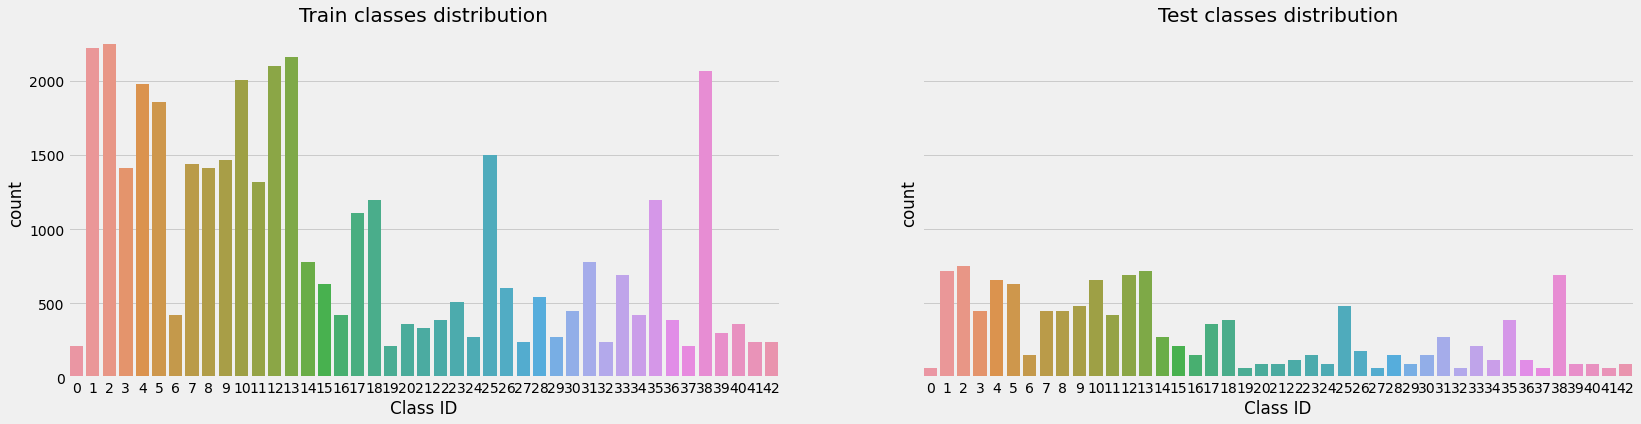

In [39]:
meta_data = os.path.join(data_dir, 'Meta.csv') # Initializng the Meta CSV file. Here, the path looks like /content/Meta.csv
train_csv = os.path.join(data_dir, 'Train.csv') # Similar to meta_data, train_csv is also a variable representing path
test_csv = os.path.join(data_dir, 'Test.csv') # Similar to meta_data, train_csv is also a variable representing path

# train_data_color = '#0f7b8e'
# test_data_color = '#630f8e'

trainDf = pd.read_csv(train_csv) # Reading train csv files 
testDf = pd.read_csv(test_csv) # Reading test csv files 
metaDf = pd.read_csv(meta_data) # Reading meta csv files 

trainDf['Path'] = list(map(lambda x: os.path.join(data_dir,x.lower()), trainDf['Path'])) # Remapping path because of kaggle converts folder to lowercase mode
testDf['Path'] = list(map(lambda x: os.path.join(data_dir,x.lower()), testDf['Path']))
metaDf['Path'] = list(map(lambda x: os.path.join(data_dir,x.lower()), metaDf['Path']))

# trainDf.sample(3)


# here, fig returns the layout of the figure and axs returns the axes object.

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(25, 6)) # here x- or y-axis will be shared among all subplots.
axs[0].set_title('Train classes distribution') # Setting the title of the first figure
axs[0].set_xlabel('Class') # Labeling x axis of the figure
axs[0].set_ylabel('Count') # Labeling y axis of the figure
axs[1].set_title('Test classes distribution') # Setting the title of the second figure
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

# Seaborn counts the number of observations per category for a categorical variable in both trainDf and testDf, and displays the results as a bar chart.
sns.countplot(trainDf.ClassId, ax=axs[0])
sns.countplot(testDf.ClassId, ax=axs[1])
axs[0].set_xlabel('Class ID'); # labeling x axis of the bar graph of trainDf
axs[1].set_xlabel('Class ID'); # labeling x axis of the bar graph of testDf

# Exploratory Data Analysis

# Image size distribution
The dataset includes thousands of photos. The resolution of the images is not the same. Some are large, while others are modest. A sample resolution has been selected that is acceptable. Multivariate charting is the best approach to view width and height correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

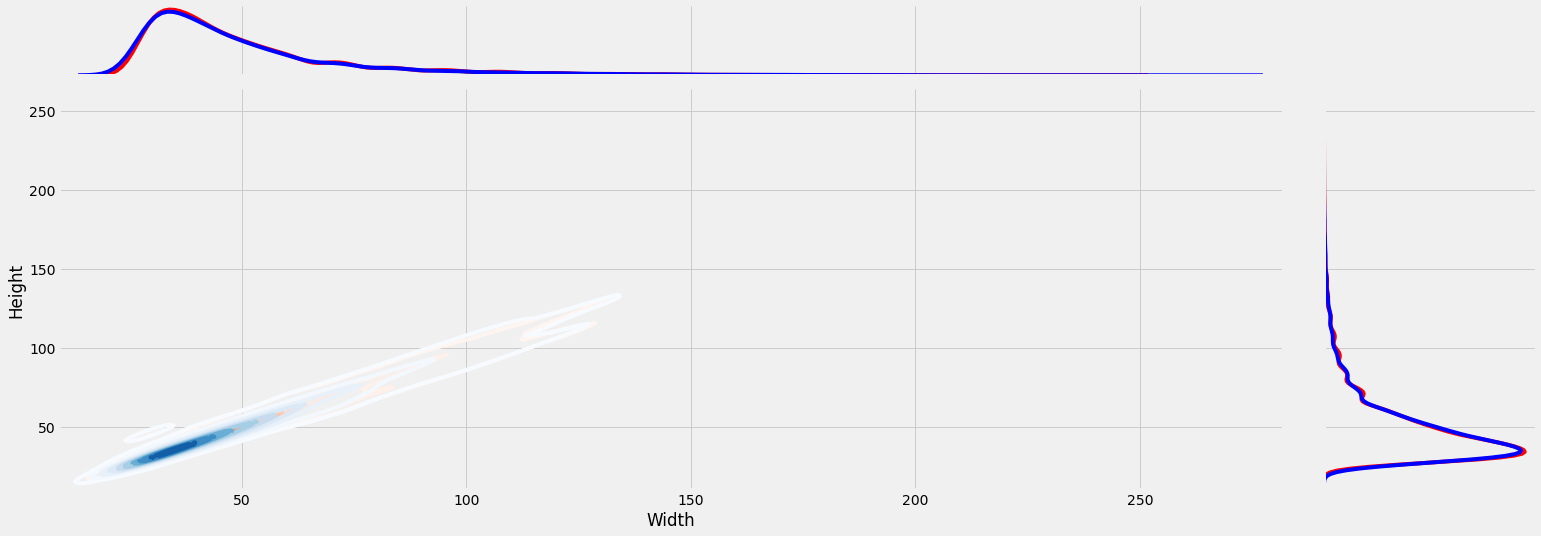

In [40]:
# trainDfDpiSubset = trainDf[(trainDf.Width < 80) & (trainDf.Height < 80)]; # filtering the trainDF dataset by only considering image's height and width below 80 px.
# testDfDpiSubset = testDf[(testDf.Width < 80) & (testDf.Height < 80)]; # Same as above for the testDF dataset

g = sns.JointGrid(x="Width", y="Height", data=trainDf) # A Jointplot comprises three plots. one is a Kernel Distribution Estimation Plot and another twos' are
# univariate distribution of observations

sns.kdeplot(trainDf.Width, trainDf.Height, cmap="Reds",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.kdeplot(testDf.Width, testDf.Height, cmap="Blues",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.distplot(trainDf.Width, kde=True, hist=False, color="r", ax=g.ax_marg_x, label='Train distribution')
sns.distplot(testDf.Width, kde=True, hist=False, color="b", ax=g.ax_marg_x, label='Test distribution')
sns.distplot(trainDf.Width, kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True)
sns.distplot(testDf.Height, kde=True, hist=False, color="b", ax=g.ax_marg_y, vertical=True)
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
plt.show();

# Target class visualization

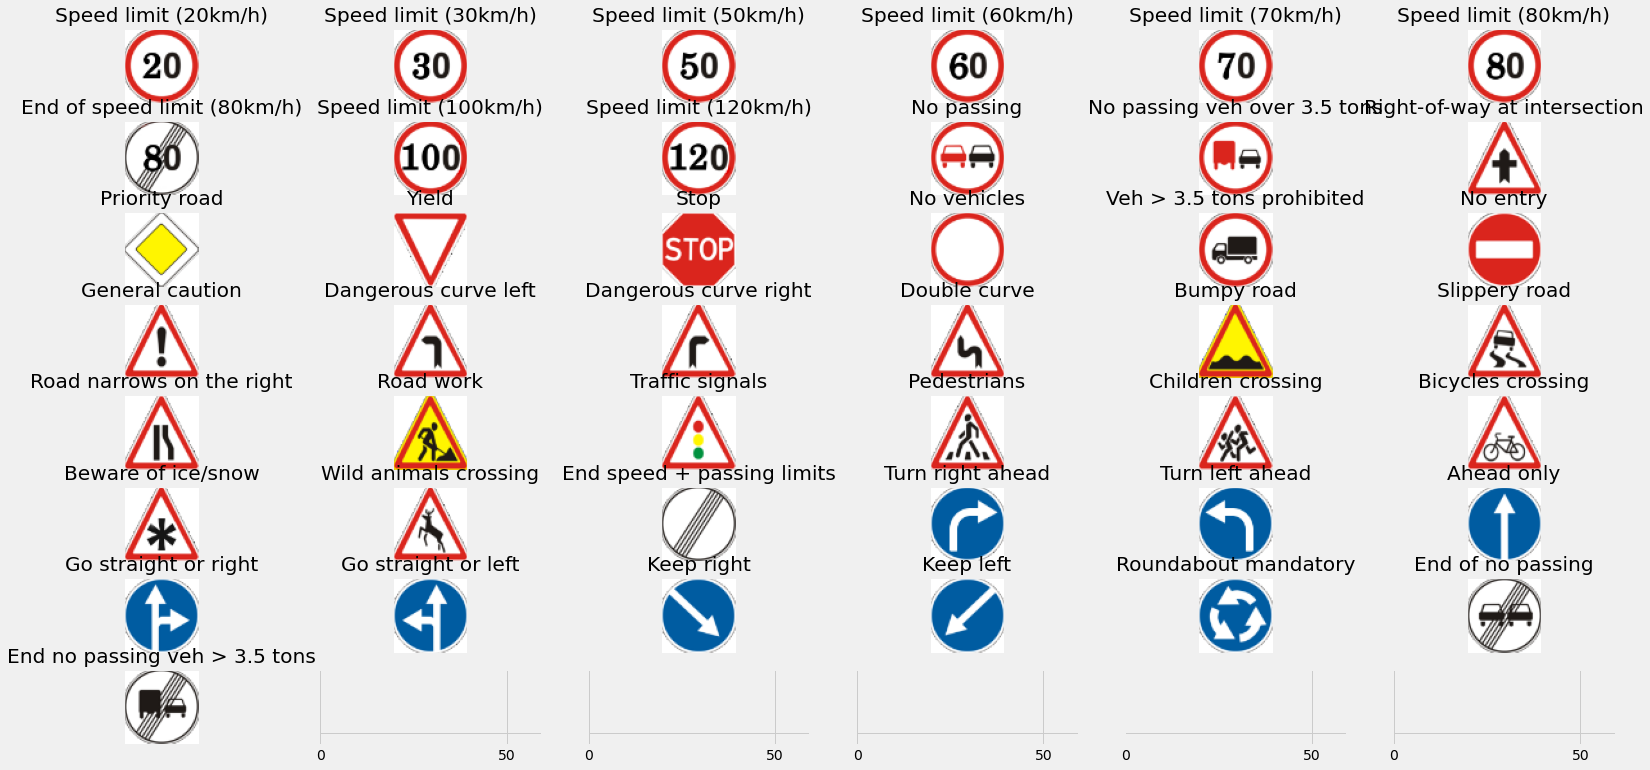

In [41]:
sns.set_style() # Style parameters govern aspects such as background color and whether or not a grid is activated by default.
rows = 8 # variable representing rows number for the visualization purpose
cols = 6 #  variable representing cols number for the visualization purpose
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12)) # Here a subplots have been created where all the figure shares x and y axis
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None) # It is a function in matplotib library, which is used to adjust or refine the subplot structure or design.
metaDf = metaDf.sort_values(by=['ClassId']) # metaDF has been sorted by the classId

idx = 0
for i in range(rows):
    for j in range(cols):
        if idx > 42:
            break
            
        img = cv2.imread(metaDf["Path"].tolist()[idx], cv2.IMREAD_UNCHANGED) # each of the image has been read and initialized to img and 
        # return the loaded image as is 
        img[np.where(img[:,:,3]==0)] = [255,255,255,255] # if a image is missing, it will be white.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Changing color for Blue Green Red to Red Green Blue.
        img = cv2.resize(img, (60,60)) # Resizing an image by changing the dimensions.
        
        axs[i,j].imshow(img) # Showing the image by following rows and columns.
        # axs[i,j].set_facecolor('xkcd:salmon') # Set the facecolor of the axs.
        # axs[i,j].set_facecolor((1.0, 0.47, 0.42))
        axs[i,j].set_title(classes[int(metaDf["ClassId"].tolist()[idx])]) # Setting the titles in each subplots
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

# Visualizing The Dataset


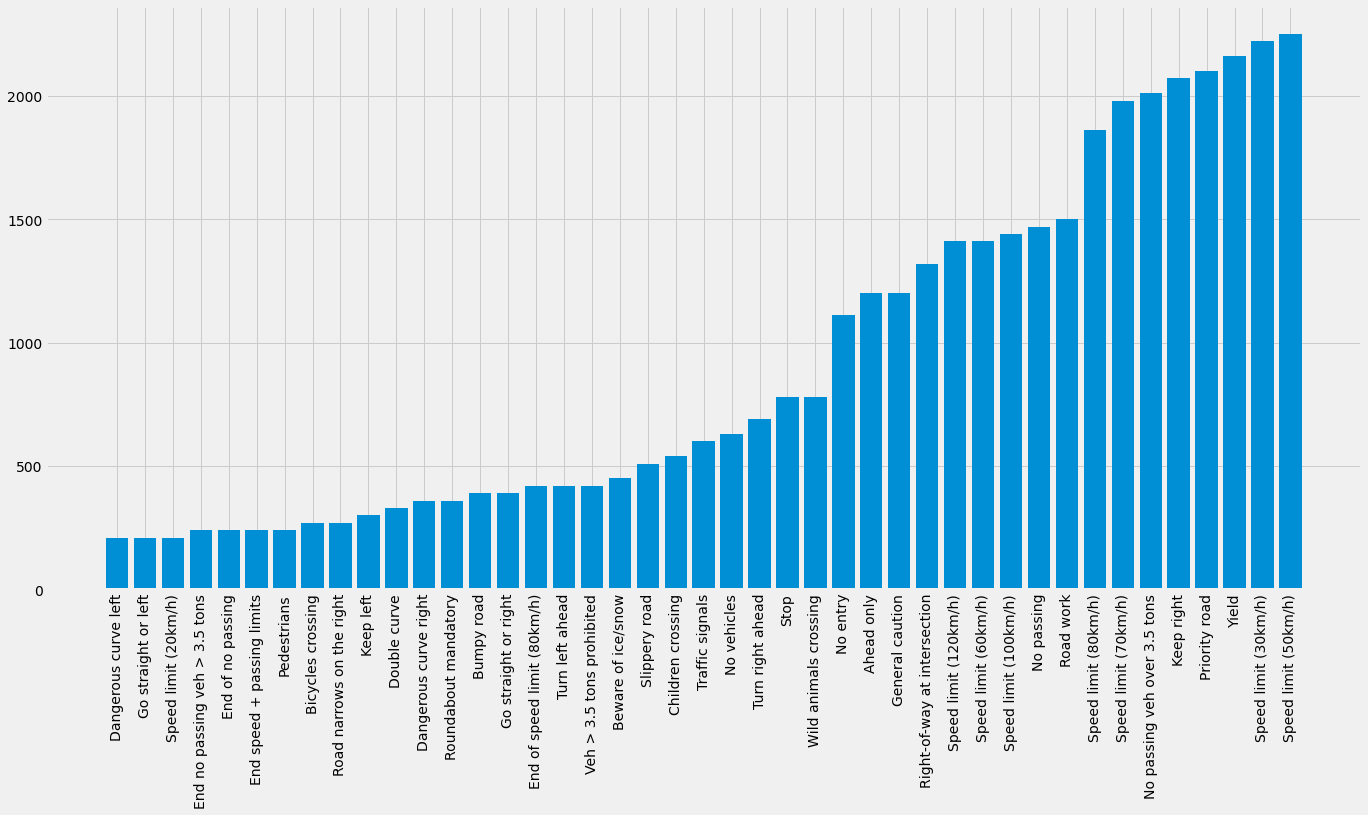

In [42]:
folders = os.listdir(train_path) # this method is used to get the directories in the specified directory

train_number = [] # empty train_number array
class_num = [] # empty class_num array

for folder in folders: 
    train_files = os.listdir(train_path + '/' + folder) # Each folder inside the train folder has been assigned to train_files
    train_number.append(len(train_files)) # total file number has been assigned to train_number 
    class_num.append(classes[int(folder)]) # Class name has been assigned according to the folder number.
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num) # returns a zip object. 
sorted_pairs = sorted(zipped_lists) # the zipped_lists has been sorted in ascending order of the elements in train_number.
tuples = zip(*sorted_pairs) #  decouple the (train_number, class_num) pairs back into two tuples containing the respective lists
train_number, class_num = [ list(tuple) for tuple in  tuples] # Two lists have been returened assigned to two variables.

plt.figure(figsize=(21,10))  # A figure has been created
plt.bar(class_num, train_number) # A bar chart has been generated where x is class_num and y is train_number.
plt.xticks(class_num, rotation='vertical') # Rotates X-Axis Ticks by vertical
plt.show()


# Visualizing 25 random images from test data

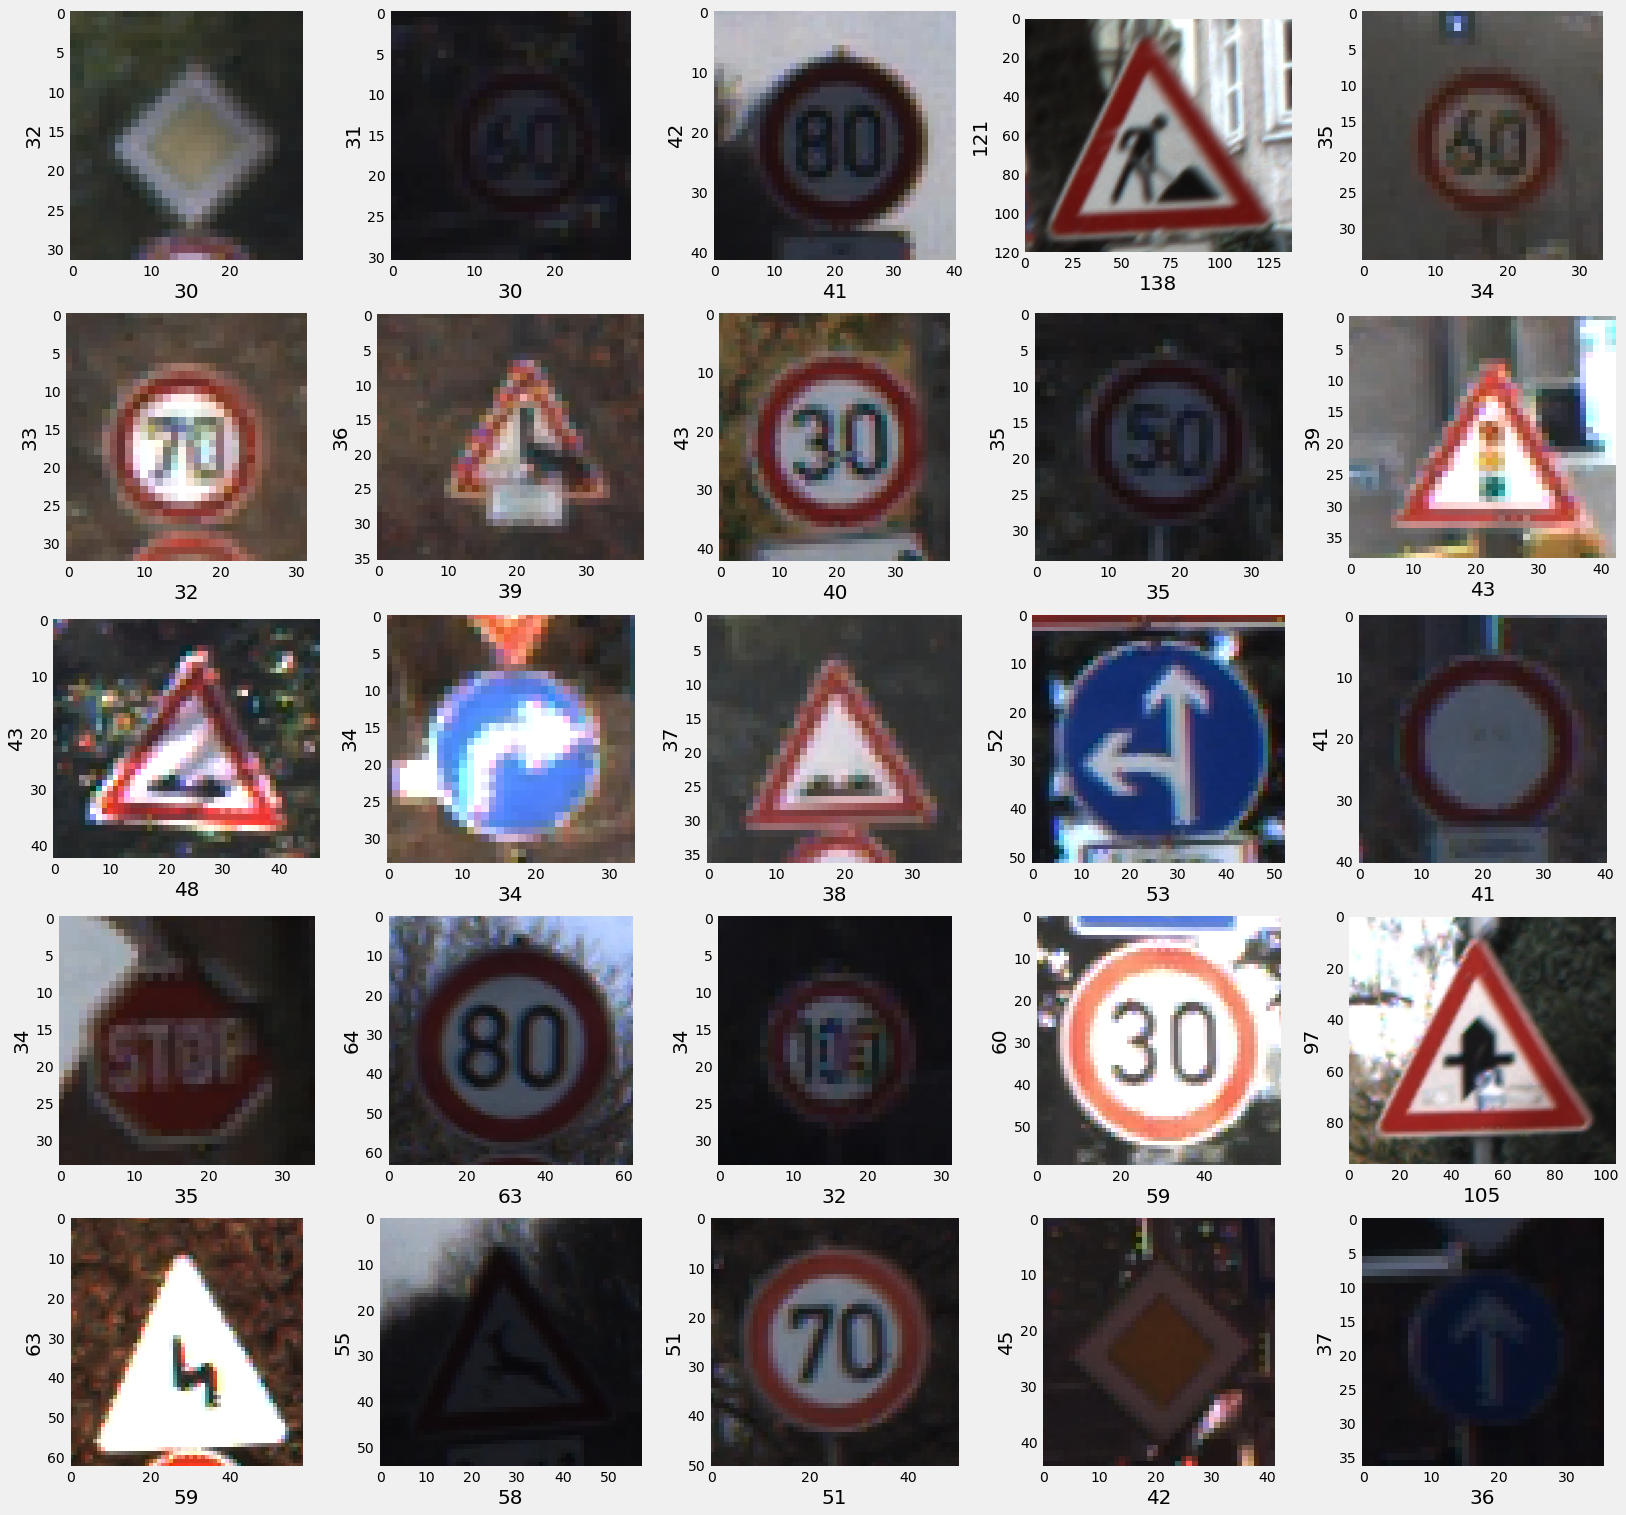

In [43]:
test = testDf
imgs = test["Path"].values # This method returns a view object. The dictionary values are stored in the view object as a list.

plt.figure(figsize=(25,25)) # Plotting a figure of width 25 and height 25

for i in range(1,26):
    plt.subplot(5,5,i) # method provides a way to plot multiple plots on a single figure.
    random_img_path =  random.choice(imgs) # returns a list with the randomly selected element from the specified sequence.
    rand_img = imread(random_img_path) # reads an image from a file into an array.
    plt.imshow(rand_img) # to display data as an image
    plt.grid(b=None) # to configure the grid lines.
    plt.xlabel(rand_img.shape[1], fontsize = 20) #width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20) #height of image

# Visualization of Samples 
Visualizing samples is an excellent way to quickly explore data. Image visualization can aid in the comprehension of data problems. Visual data exploration can lead to the discovery of some solutions (such as histogram equalization).

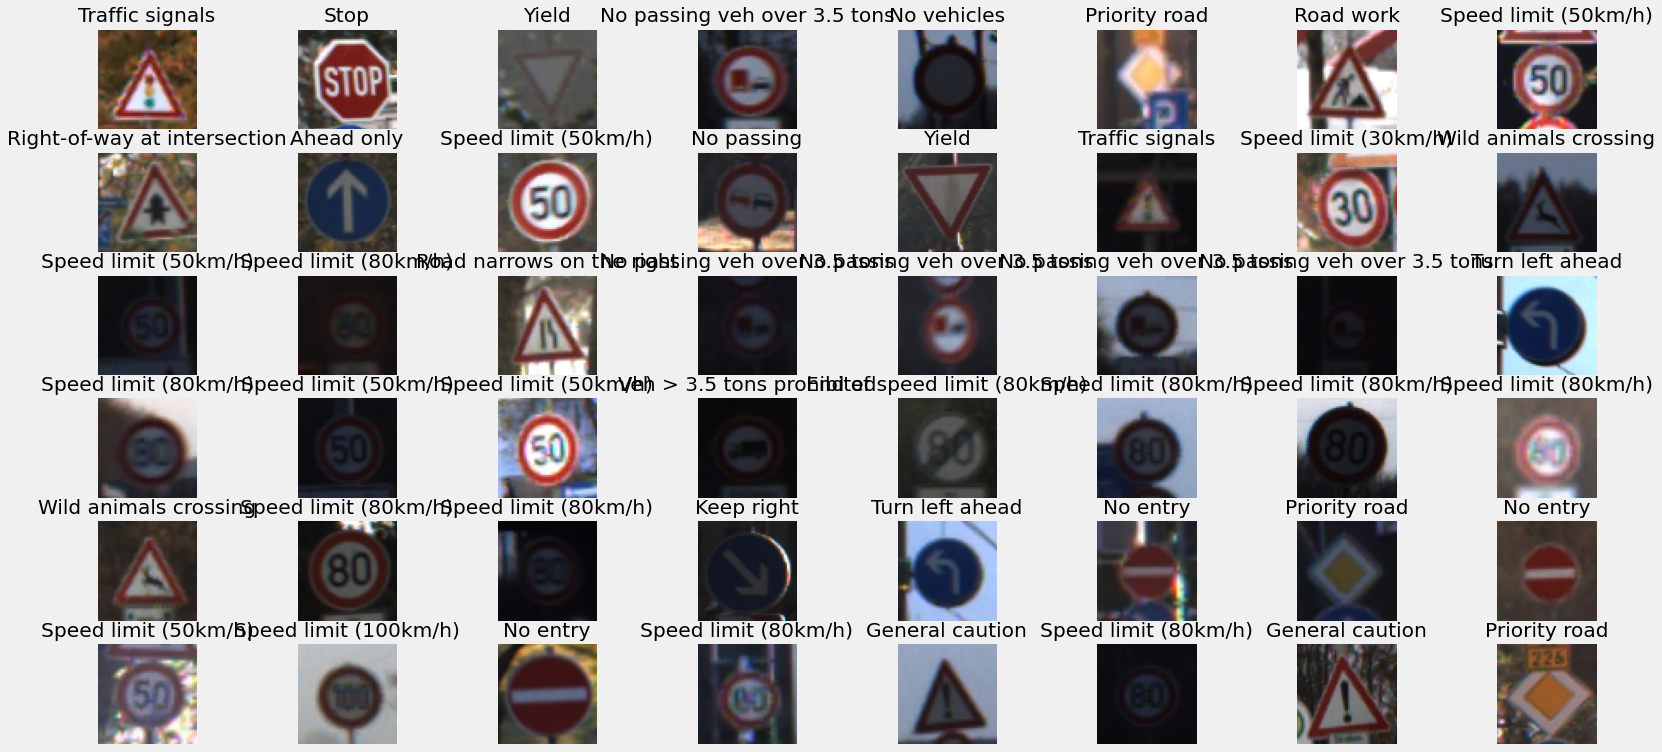

In [44]:
rows = 6
cols = 8
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None) # to modify the subplot's layout.
visualize = trainDf.sample(rows*cols) # to get random sample of DataFrame

idx = 0
for i in range(rows):
    for j in range(cols):
        img = cv2.imread(visualize["Path"].tolist()[idx]) # reading image which convert a series to list
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # to convert an image from BGR to RGB.
        img = cv2.resize(img, (60,60)) # Returns a resized copy of this image.
        axs[i,j].imshow(img) # to display data as an image
        axs[i,j].set_title(classes[int(visualize["ClassId"].tolist()[idx])]) # to set a title for the axs.
        axs[i,j].get_xaxis().set_visible(False) # return the XAxis instance but visibility is negative
        axs[i,j].get_yaxis().set_visible(False) # return the YAxis instance  but visibility is negative
        idx += 1

# Obtaining Training Data

In [45]:
image_data = []
image_labels = []

img_height = 30 # Resizing image height to 30 
img_width = 30 # Resizing image width to 30 

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i) # Setting path to each folder inside Train Directory
    images = os.listdir(path) #  to get the list of all files in this specified directory.

    for img in images:
        try:
            image = cv2.imread(path + '/' + img) # reading each image files in the Train folder
            image_fromarray = Image.fromarray(image, 'RGB') # The function accepts an array object as input and returns an image with RGB object created from the array object.
            resize_image = image_fromarray.resize((img_height, img_width)) # Resizing the image objects
            image_data.append(np.array(resize_image)) # Adding each image object into image_data
            image_labels.append(i) # Adding each label number into image_label
        except:
            print("Error in " + img)


image_data = np.array(image_data) # Changing list to the numpy array
image_labels = np.array(image_labels)  # Changing list to the numpy array

print(image_data.shape, image_labels.shape) # Printing the shapes

(39209, 30, 30, 3) (39209,)


In [46]:
shuffle_indexes = np.arange(image_data.shape[0]) # Returns an array with evenly spaced elements
np.random.shuffle(shuffle_indexes) # to get the random positioning of different elements in the numpy array
image_data = image_data[shuffle_indexes] # images have been randomized
image_labels = image_labels[shuffle_indexes] # labels have been randomized respects to labels

# Splitting the Dataset

In [47]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True) # sample a training set while holding out 30% of the data for testing
# where train-test splits are always deterministic
X_train = X_train/255 # Data normalization in Keras
X_val = X_val/255 # Data normalization in Keras

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


# One hot encoding the labels

In [48]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES) # different categories has been converted into a numpy array (or) a matrix \
# which has binary values and has columns equal to the number of categories in the data.
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES) # same as before

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


# Designing the model

In [49]:
channels = 3 # Assiging channel
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_height,img_width,channels)),
    # 2D convolution layer which creates a convolution kernel. Here the a total of 16 filters have been applied. Then the kernel_size 3×3 has been used
    # Then the rectified linear unit activation function has been applied and at the end input shape has been specified.
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)), # Max Pooling has been used to reduce the spatial dimensions of the output volume.
    keras.layers.BatchNormalization(axis=-1), # solves a major problem called internal covariate shift. It applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    
    # In forward pass, two filters has been used and convolved them on the input. Each 'convolution' gives a 2D matrix output.

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), # Same as before except the filter size is different
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(), # Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
    keras.layers.Dense(512, activation='relu'), # A Dense(512) has 512 neurons. Dense layer is basically used for changing the dimensions of the vector.
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5), # It is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.
    
    keras.layers.Dense(43, activation='softmax') # predict a multinomial probability distribution. 
])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 128)        

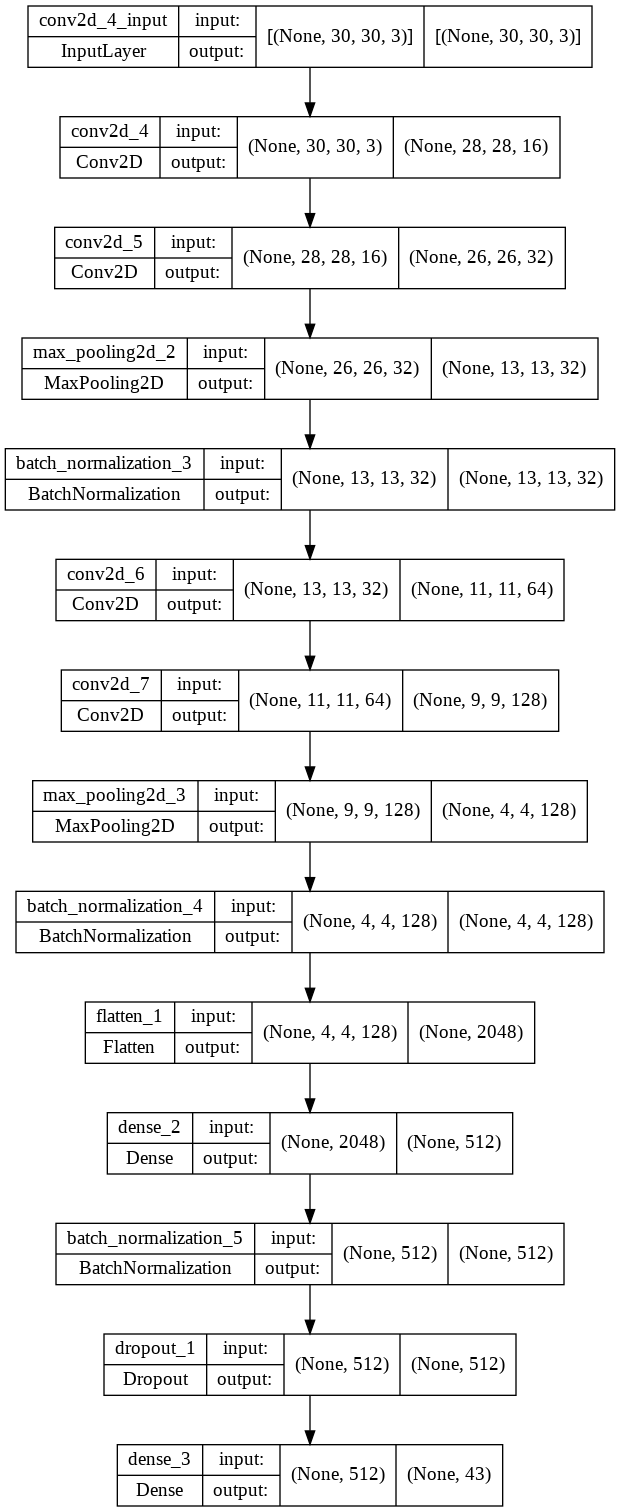

In [51]:
tf.keras.utils.plot_model(model,show_shapes=True) # Demonstrating all the hidden layers

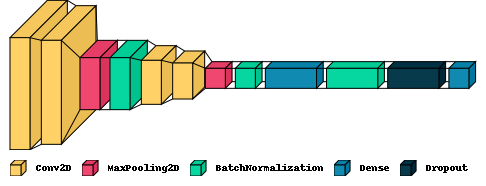

In [52]:
visualkeras.layered_view(model, type_ignore=[layers.Flatten], legend=True) # Visualizing the Model


# Configuring the learning process

In [53]:
learning_rate = 0.001 # A hyperparameter that controls how much to change the model 
epochs = 20 # The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.

opt = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5)) # Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

# A metric is a function that is used to judge the performance of the model.

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # The loss function's objective is to crossentropy metric between the labels and predictions. 
# For this classification problem, the metric has been set to accuracy.

# Increasing the amount of data and training the model

In [54]:
# Generate batches of tensor image data with real-time data augmentation. 
aug = ImageDataGenerator(
    rotation_range=10, # random rotations of image
    zoom_range=0.15, #  zoom in on the image
    width_shift_range=0.1, # shifting the pixels of the image either horizontally or vertically to center center of the image
    height_shift_range=0.1, 
    shear_range=0.15, 
    horizontal_flip=False, # Random Fliping of the images.
    vertical_flip=False,
    fill_mode="nearest") # Replaces the empty area with the nearest pixel values

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))
# Fitting model on the data. This will calculate any statistics required to actually perform the transforms to image data.
# where X_train and y_train are the training data for feature class and prediction class respectively,
# batch_size represents the number of batch division used in each training epoch. Here 32 batches are trained per epoch for 20 times.


Epoch 1/20
858/858 [==============================] - 88s 102ms/step - loss: 1.0887 - accuracy: 0.7042 - val_loss: 0.0792 - val_accuracy: 0.9764
Epoch 2/20
858/858 [==============================] - 95s 111ms/step - loss: 0.1712 - accuracy: 0.9491 - val_loss: 0.0526 - val_accuracy: 0.9827
Epoch 3/20
858/858 [==============================] - 88s 102ms/step - loss: 0.1013 - accuracy: 0.9698 - val_loss: 0.0249 - val_accuracy: 0.9933
Epoch 4/20
858/858 [==============================] - 87s 101ms/step - loss: 0.0768 - accuracy: 0.9761 - val_loss: 0.0308 - val_accuracy: 0.9916
Epoch 5/20
858/858 [==============================] - 87s 101ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0172 - val_accuracy: 0.9957
Epoch 6/20
858/858 [==============================] - 86s 101ms/step - loss: 0.0561 - accuracy: 0.9834 - val_loss: 0.0377 - val_accuracy: 0.9905
Epoch 7/20
858/858 [==============================] - 87s 102ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0119 - val_ac

# Analyzing the model

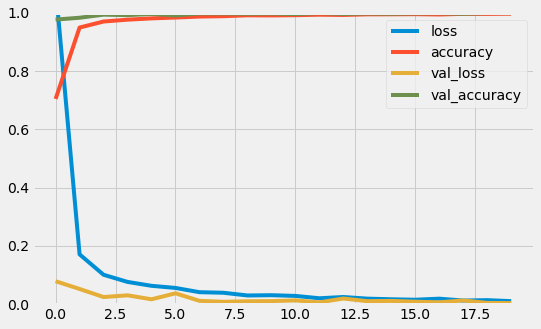

In [55]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) # # summarize history for accuracy and loss for train and validation dataset.
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Loading test data and evaluating metrics

In [56]:
test = pd.read_csv(data_dir + '/Test.csv') # Loading the test dataset

labels = test["ClassId"].values # Initializing the classID
imgs = test["Path"].values # Initialing the paths

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img) # Reading the images from test folder
        image_fromarray = Image.fromarray(image, 'RGB') #  The function accepts an array object as input and returns an image with RGB object created from the array object.
        resize_image = image_fromarray.resize((img_height, img_width)) # Resizing the image objects
        data.append(np.array(resize_image)) # Adding images in the data
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255 # normalizes the images

test_y = np.array(test.ClassId) # Creating array


# pred = model.predict_classes(X_test)
pred=model.predict(X_test)  # enables to predict the labels of the data values
classes_x = np.argmax(pred,axis=1) # returns indices of the max element of the array in a particular axis. 



# Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, classes_x)*100)

# Precision with the test data
precision = precision_score(labels, classes_x, average="weighted")
print('Precision: ', precision * 100)

# Recall with the test data
recall = recall_score(labels, classes_x, average="weighted")
print('Recall: ', recall * 100)

# F1 score with the test data
f1 = f1_score(labels, classes_x, average="weighted")
print('F1 score:', f1 * 100)

Test Data accuracy:  98.15518606492478
Precision:  98.2440116267321
Recall:  98.15518606492478
F1 score: 98.11570579048382


# The Confusion Matrix in Visual Form

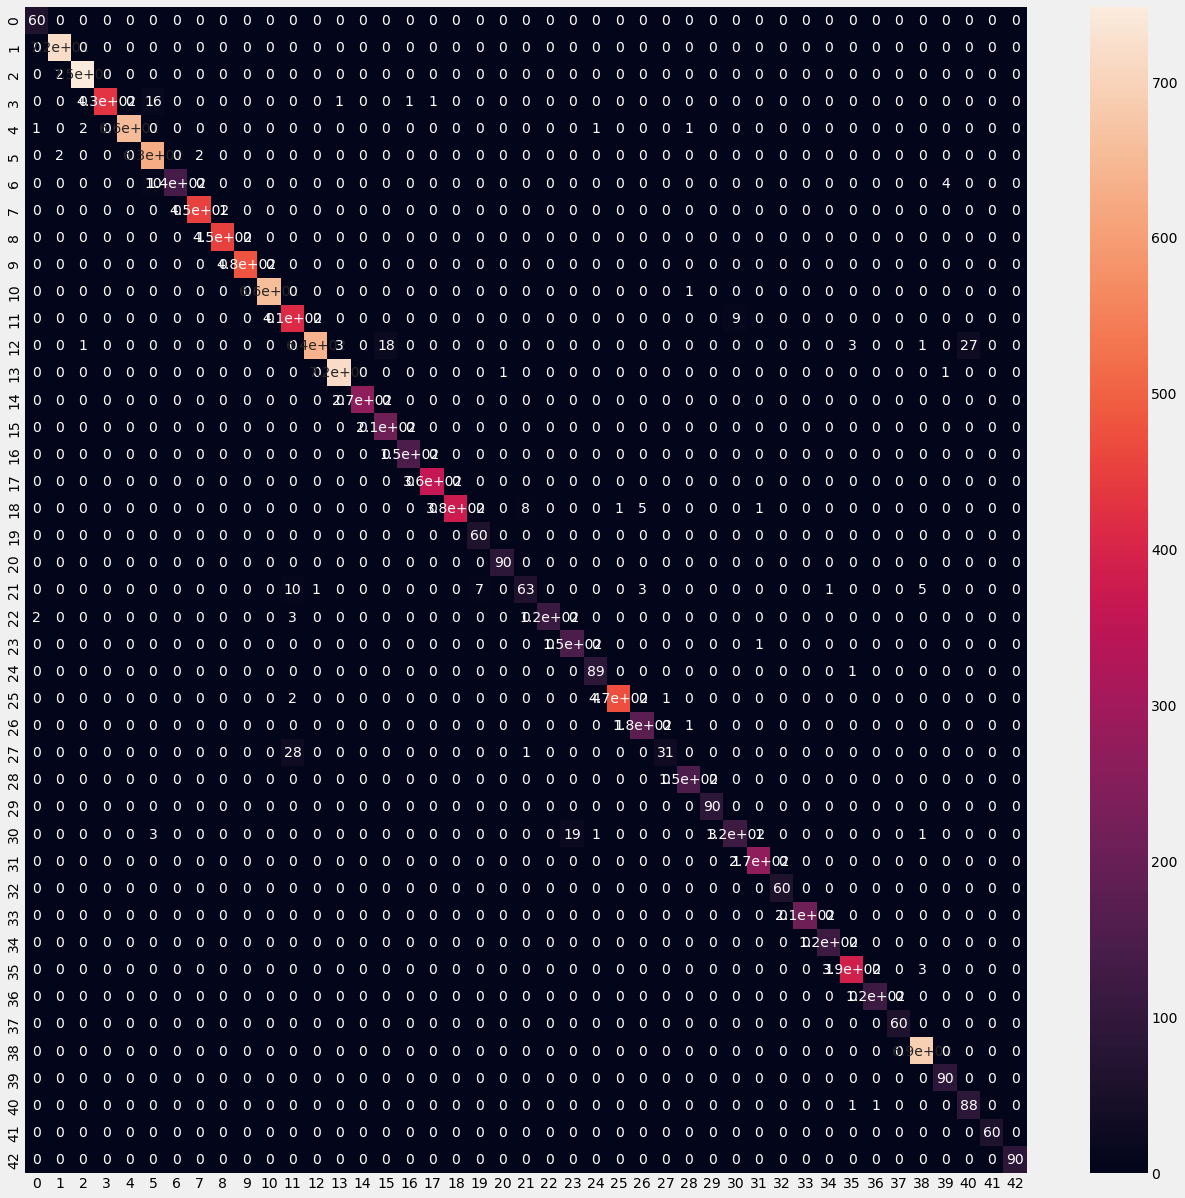

In [57]:

cf = confusion_matrix(labels, classes_x) # Compute confusion matrix to evaluate the accuracy of a classification.

df_cm = pd.DataFrame(cf, index = classes,  columns = classes) # A pandas DataFrame has been created 
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True) # A plot of rectangular data as a color-encoded matrix

# Test Data Predictions

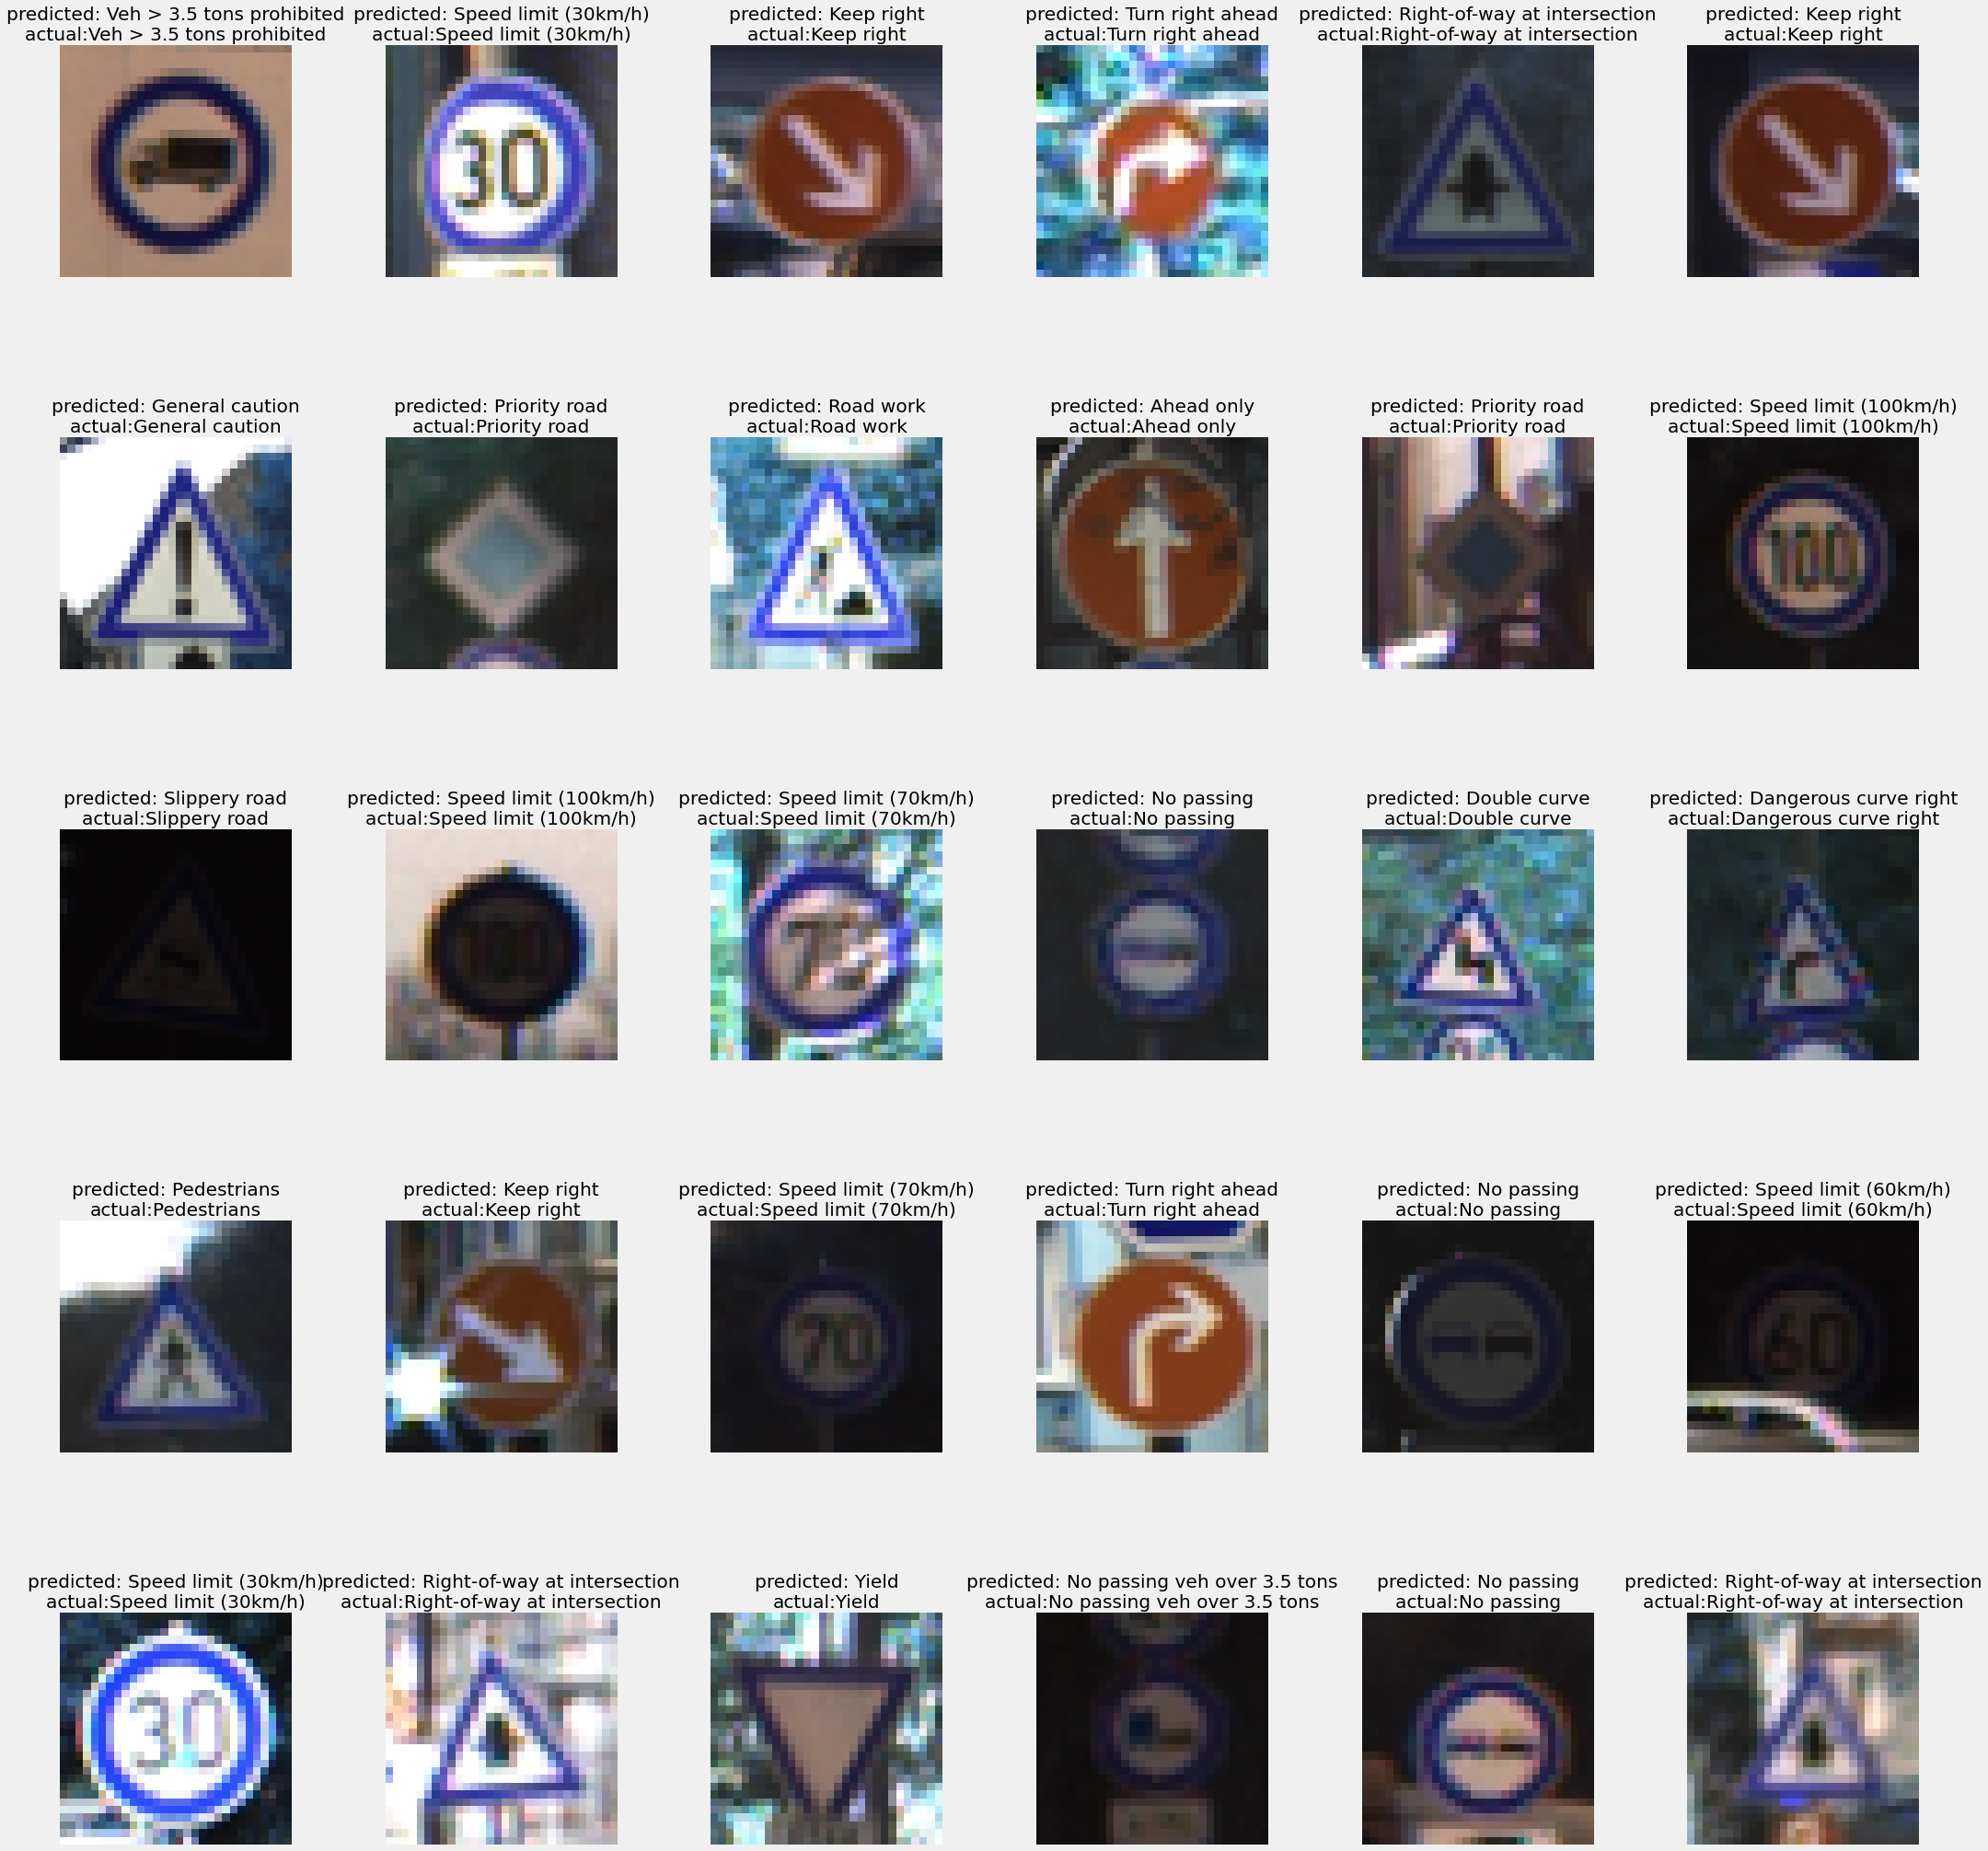

In [58]:
# print(prob[1])
plt.figure(figsize=(30,30))
for i in range(30):
    ax = plt.subplot(5,6,i+1)
    ax.imshow(X_test[i])
    ax.set_title(f'predicted: {classes[classes_x[i]]}\nactual:{classes[test_y[i]]}') # Checking the titles
    plt.axis('off')
plt.tight_layout()
plt.show()